# WELCOME!

Welcome to **"Bike Demand Visualization Project"**. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [65]:
df = pd.read_csv("store_sharing.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [11]:
#missing values
missing = df.isnull().sum()
missing

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [9]:
#duplicates
duplicate = df.duplicated().value_counts()
duplicate

False    17414
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

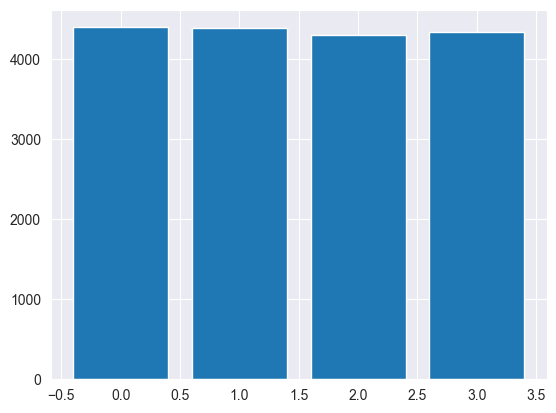


 0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64


In [207]:
# season
plt.bar(df['season'].value_counts().index, df['season'].value_counts().values)
plt.show()

# to check value counts of this column for more clear info.
print('\n', df.season.value_counts())

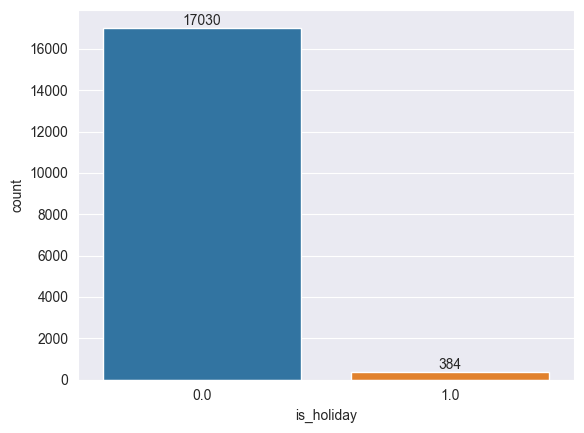

In [210]:
# is_holiday
df_plot = sns.countplot(data = df, x = 'is_holiday')
# result
for label in df_plot.containers:
    df_plot.bar_label(label)
plt.show()

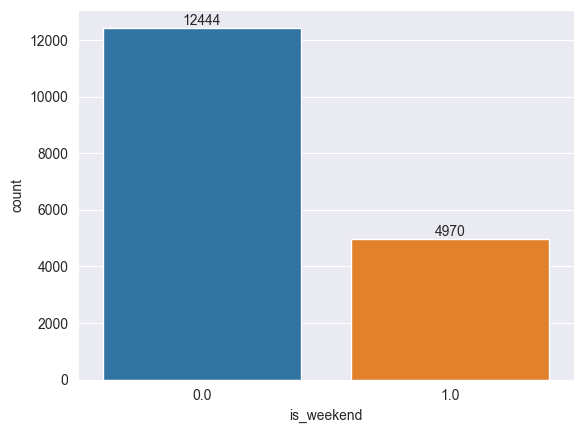

In [211]:
# is_weekend
df_plot = sns.countplot(data = df, x = 'is_weekend')
# result
for label in df_plot.containers:
    df_plot.bar_label(label)
plt.show()

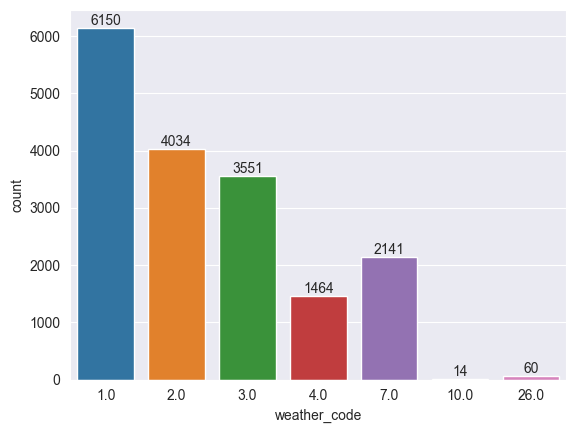

In [209]:
#weather_code
df_plot = sns.countplot(data = df, x = 'weather_code')
# result
for label in df_plot.containers:
    df_plot.bar_label(label)
plt.show()

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [47]:
#data types
type = df.dtypes
type

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [66]:
#convert timestamp in type and set it as index.
df["timestamp"] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [69]:
#to make feature engineering
df["year_month"] = df.index.strftime('%Y-%m')
df["year"] = df.index.year
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.weekday
df["hour"] = df.index.hour
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017-01,2017,1,3,1,19
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,1,20
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,1,21


In [70]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

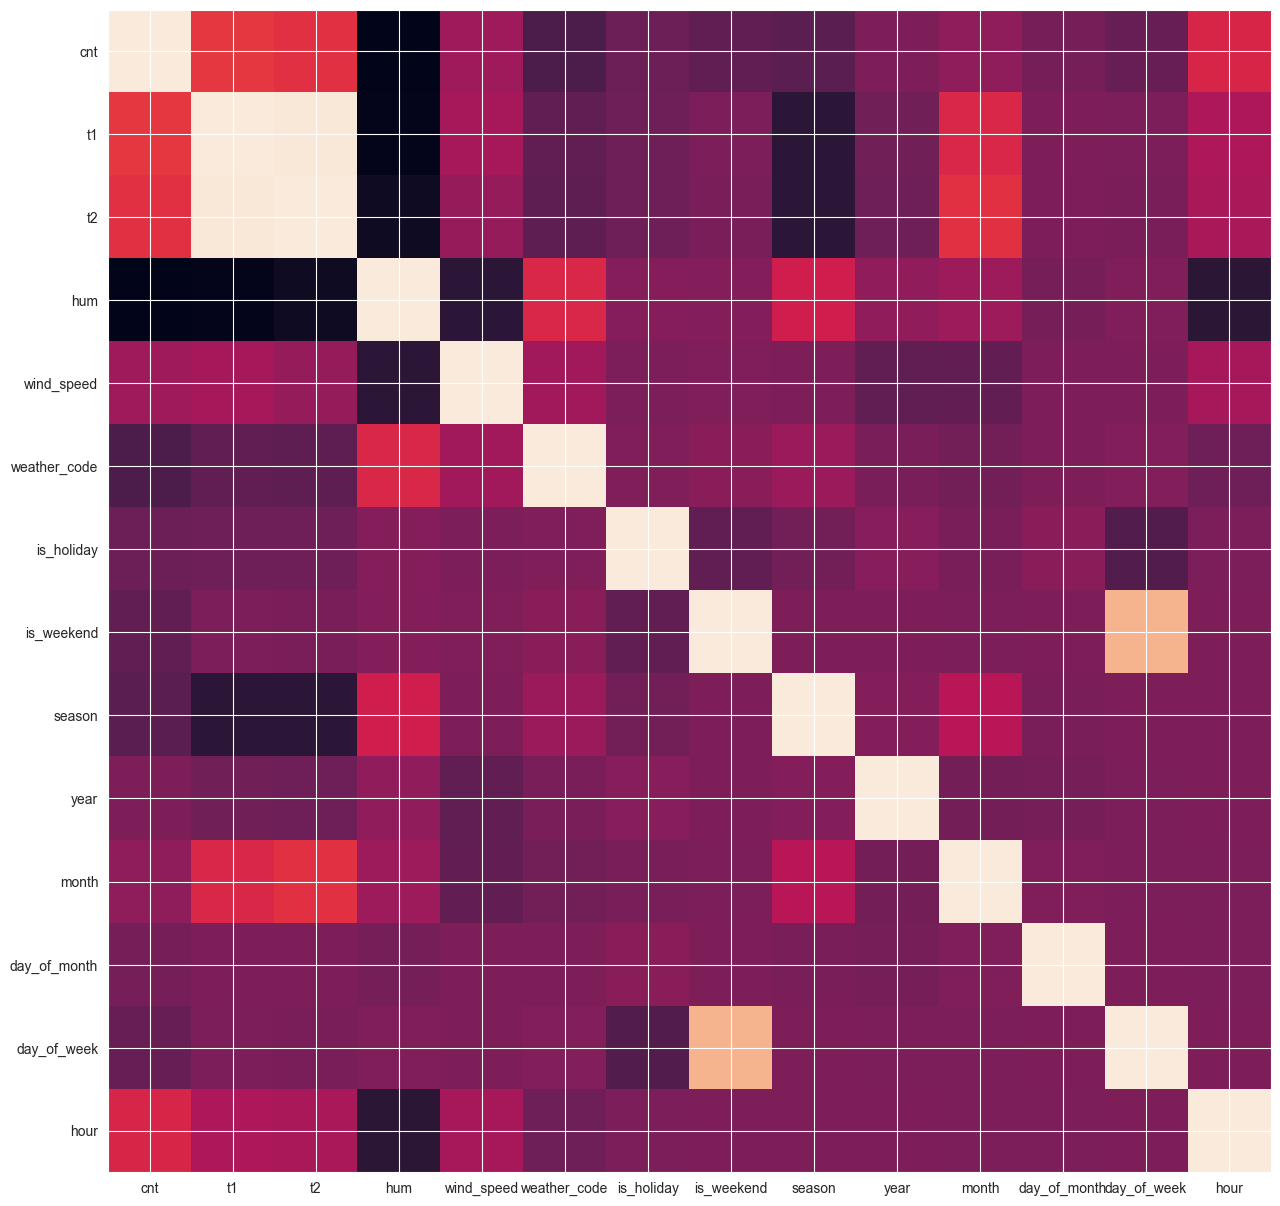

In [215]:
# for all variables 
plt.figure(figsize=(15, 20))
plt.imshow(df.corr())
plt.xticks(range(len(df.corr().columns)), df.corr().columns)
plt.yticks(range(len(df.corr().columns)), df.corr().columns)
plt.show()

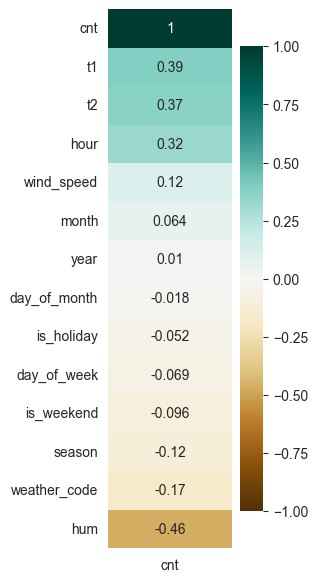

In [98]:
# for the target variable
df_corr_cnt = df.corr()[['cnt']].sort_values(by='cnt', ascending=False)
df_corr_cnt
plt.figure(figsize=(2, 7))
sns.heatmap(df_corr_cnt, vmin=-1, vmax=1, annot=True, cmap='BrBG')

### 8. Visualize the correlation of the target variable and the other features with barplot

<AxesSubplot: >

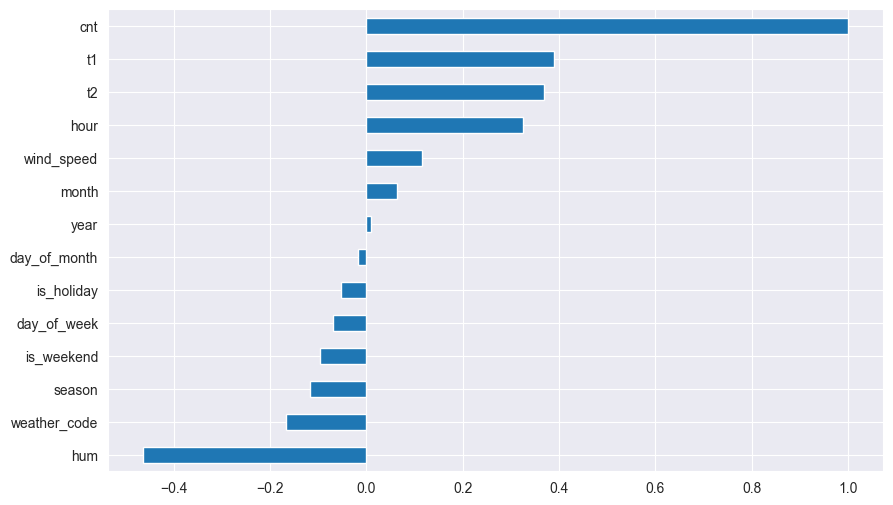

In [101]:
#with pandas
plt.figure(figsize=(10, 6))
df.corr()["cnt"].sort_values().plot.barh()

### 9.Plot bike shares over time use lineplot

<AxesSubplot: title={'center': 'Bike Shares Over Time'}, xlabel='Date', ylabel='Count of Bike Shares'>

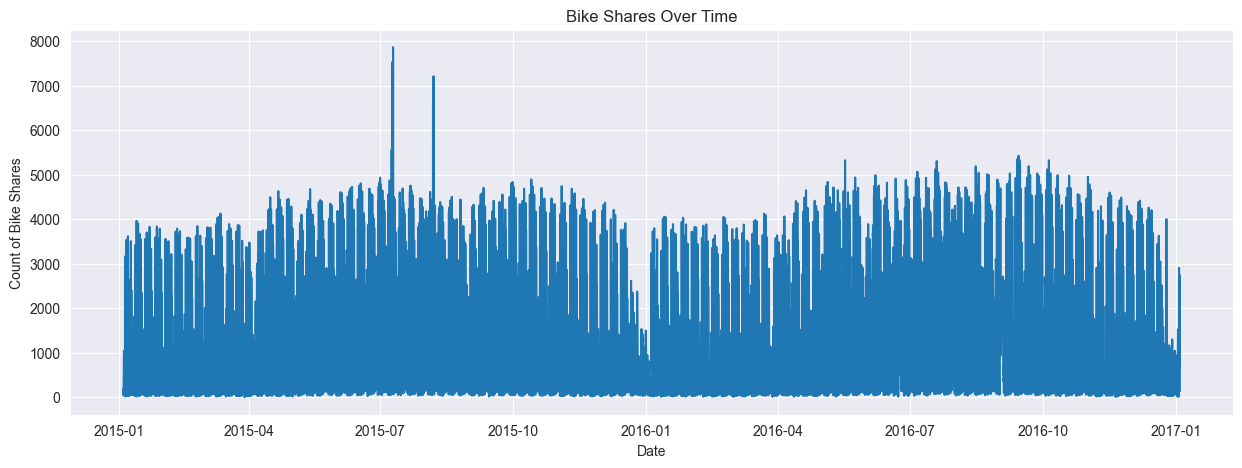

In [107]:
plt.figure(figsize=(15, 5))
plt.ylabel('Count of Bike Shares')
plt.xlabel('Date')
plt.title(label='Bike Shares Over Time')
sns.lineplot(x = df.index, y = "cnt", data= df)

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [121]:
year_month = pd.DataFrame(df.groupby("year_month").cnt.sum())
year_month

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


<AxesSubplot: xlabel='year_month', ylabel='cnt'>

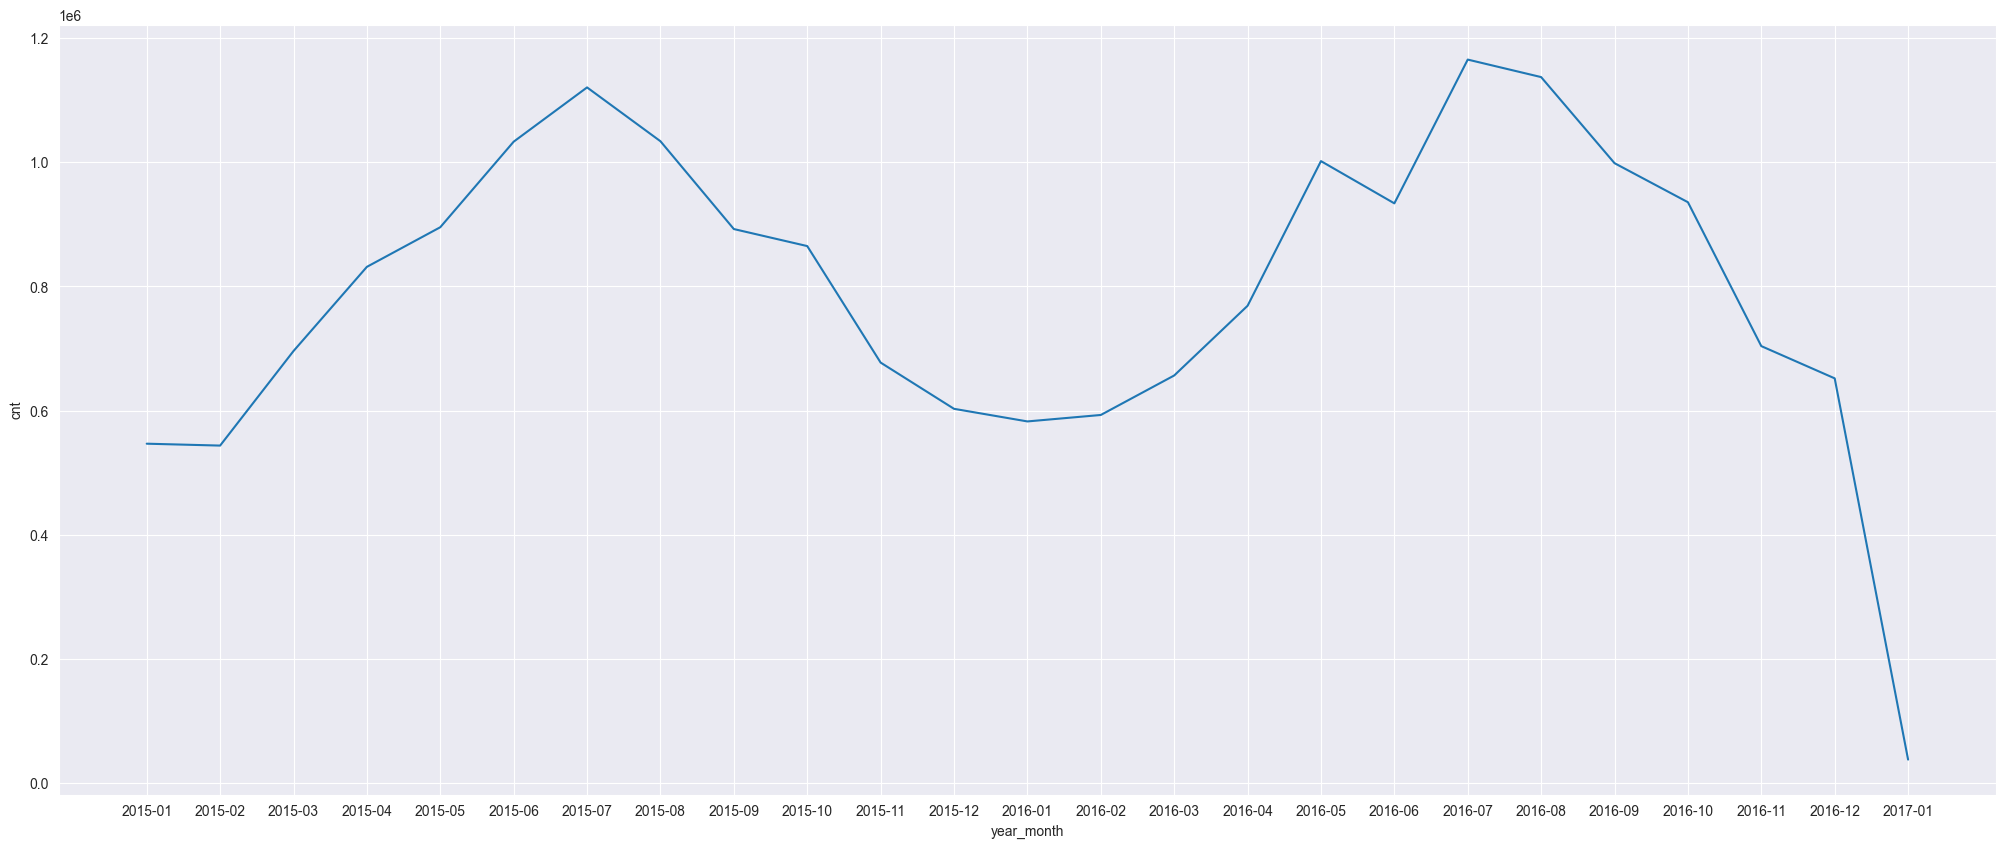

In [145]:
# with lineplot
plt.figure(figsize=(25, 10))
result = sns.lineplot(x = 'year_month', y = 'cnt', data = year_month)
result

<AxesSubplot: xlabel='month', ylabel='cnt'>

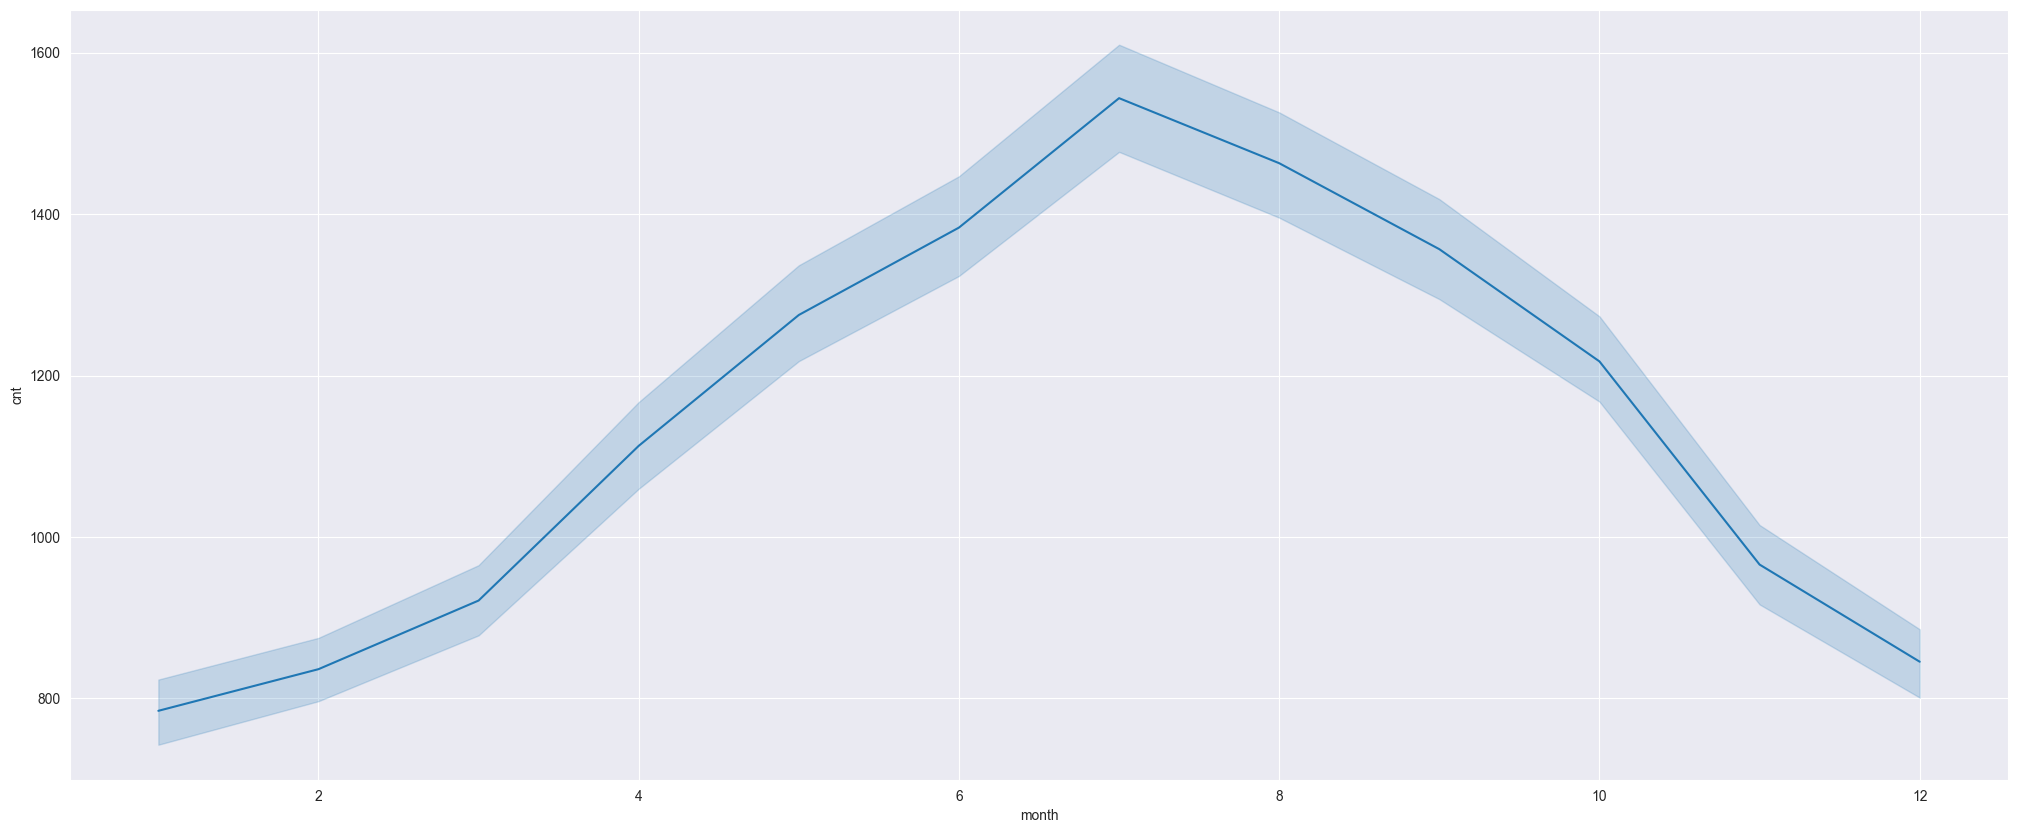

In [150]:
# with lineplot
df.groupby('month')['cnt'].mean()
plt.figure(figsize=(25, 10))
result = sns.lineplot(data = df, x = 'month', y = 'cnt')
result

<AxesSubplot: xlabel='month', ylabel='cnt'>

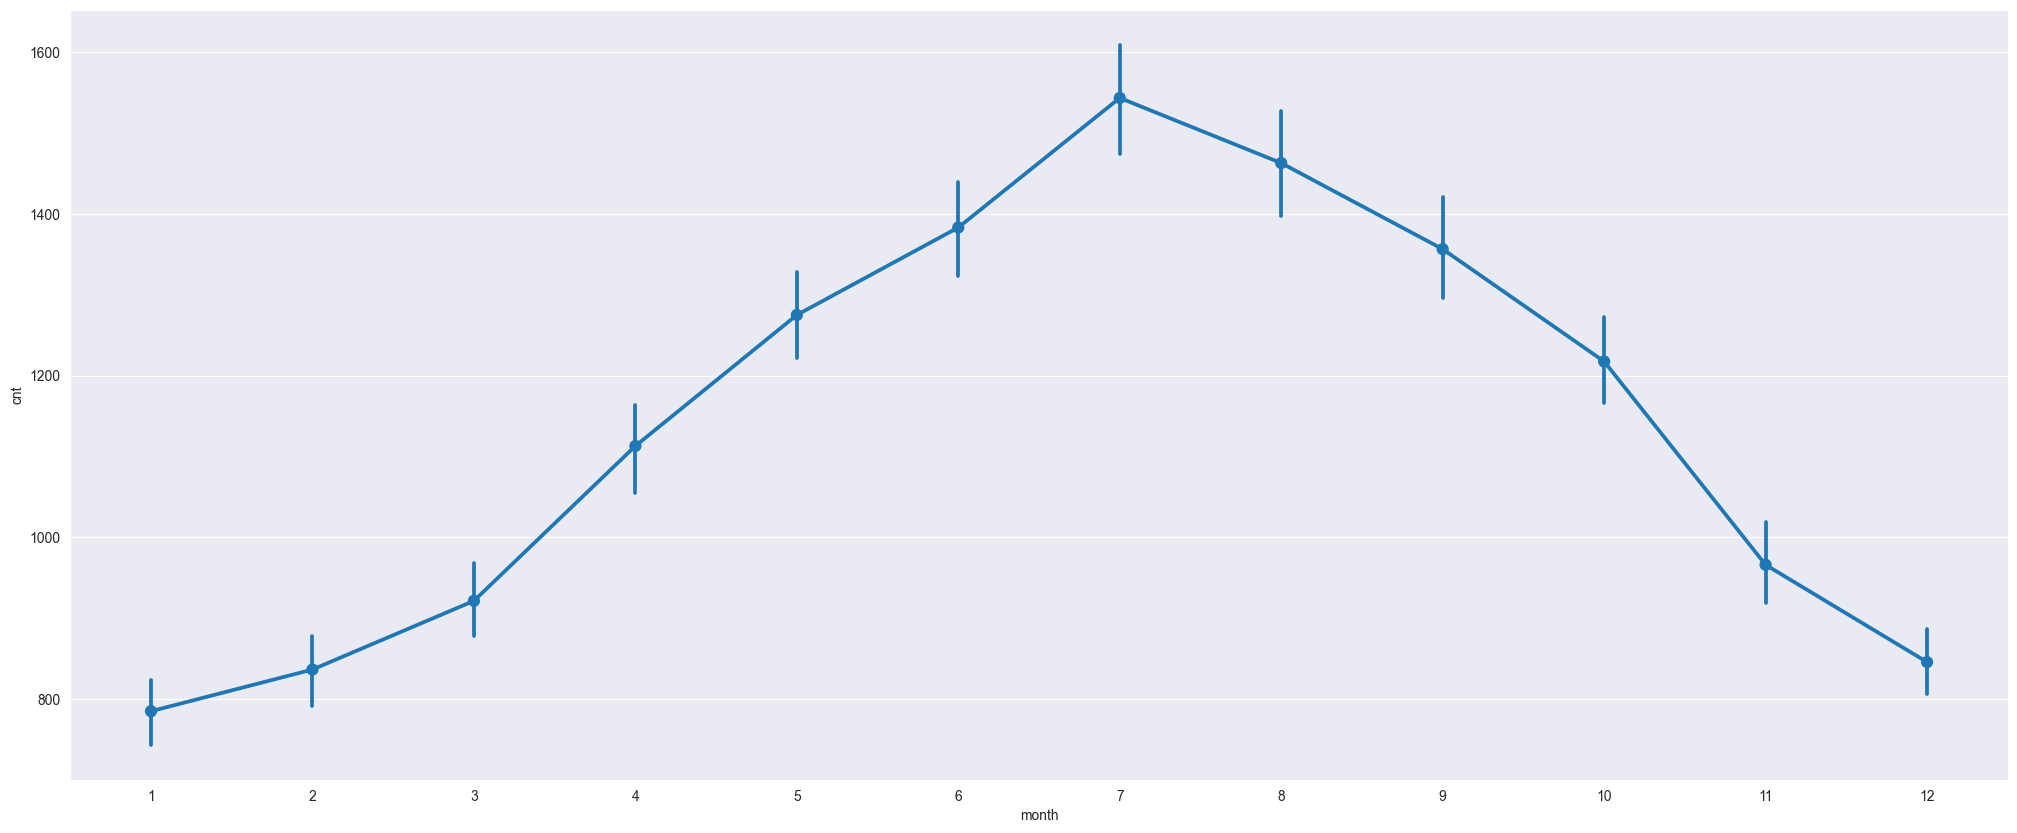

In [149]:
# with pointplot
plt.figure(figsize=(25, 10))
result = sns.pointplot(data=df, x = 'month', y = 'cnt')
result

<AxesSubplot: xlabel='month', ylabel='cnt'>

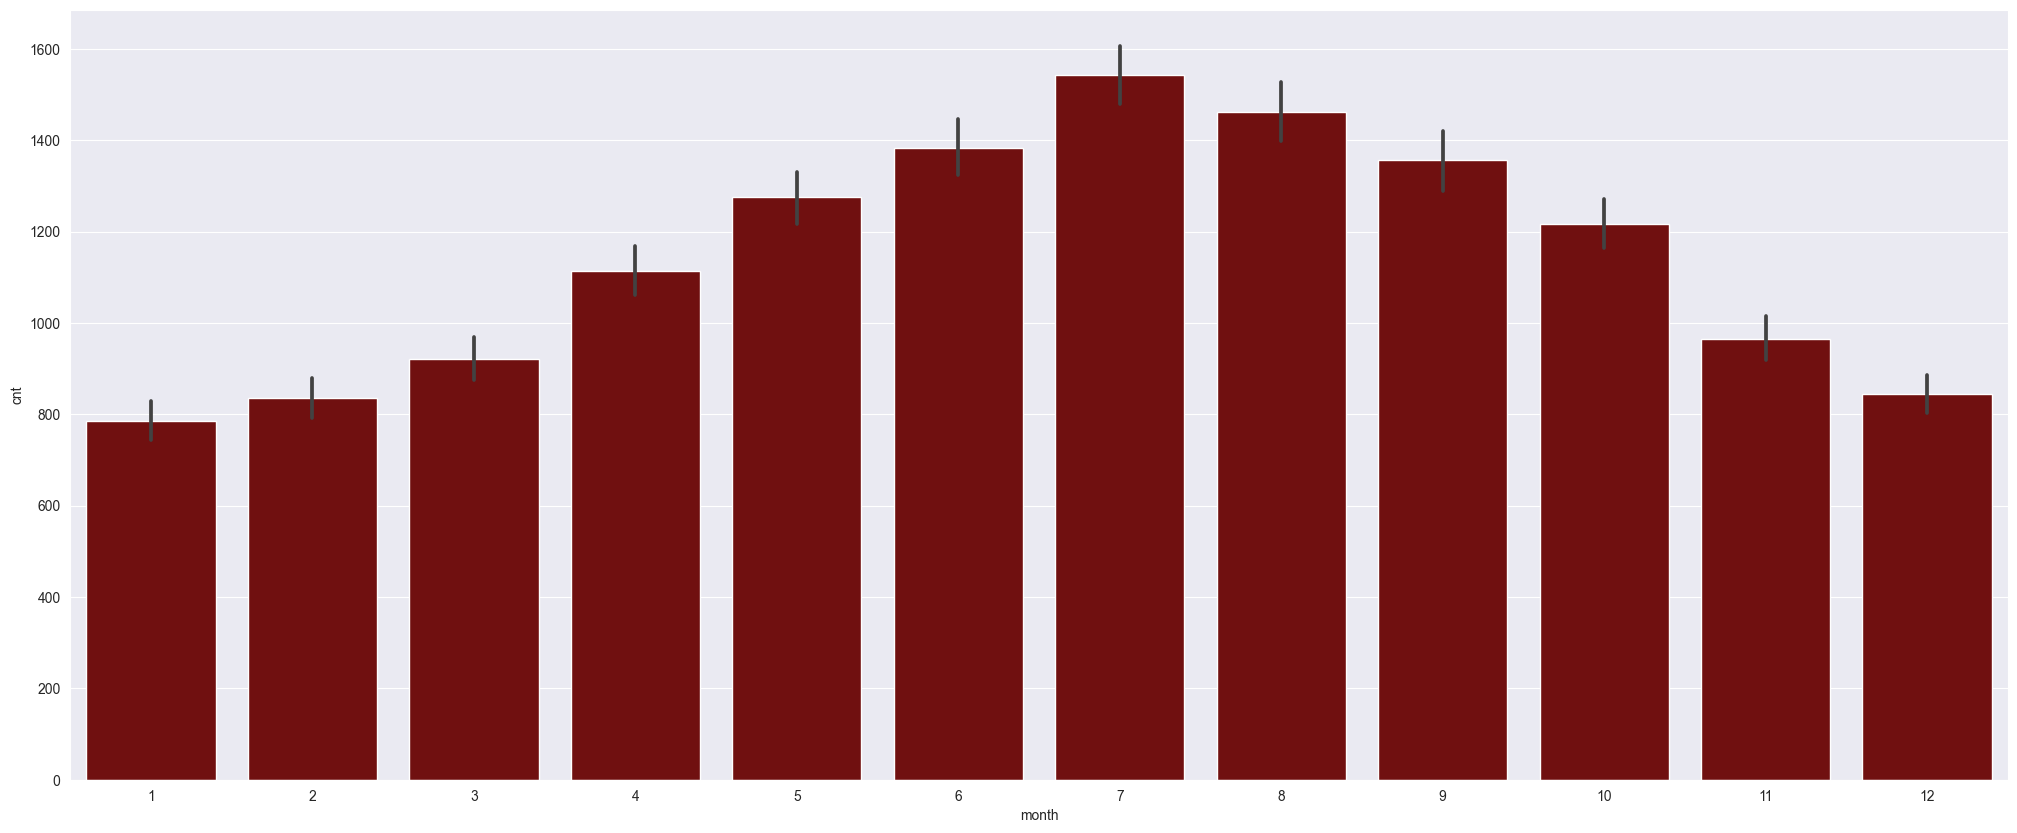

In [154]:
# with barplot
plt.figure(figsize=(25, 10))
result = sns.barplot(data= df, x = 'month', y = 'cnt', color = 'maroon')
result

### 11.Plot bike shares by hours on (holidays, weekend, season)

<AxesSubplot: xlabel='hour', ylabel='cnt'>

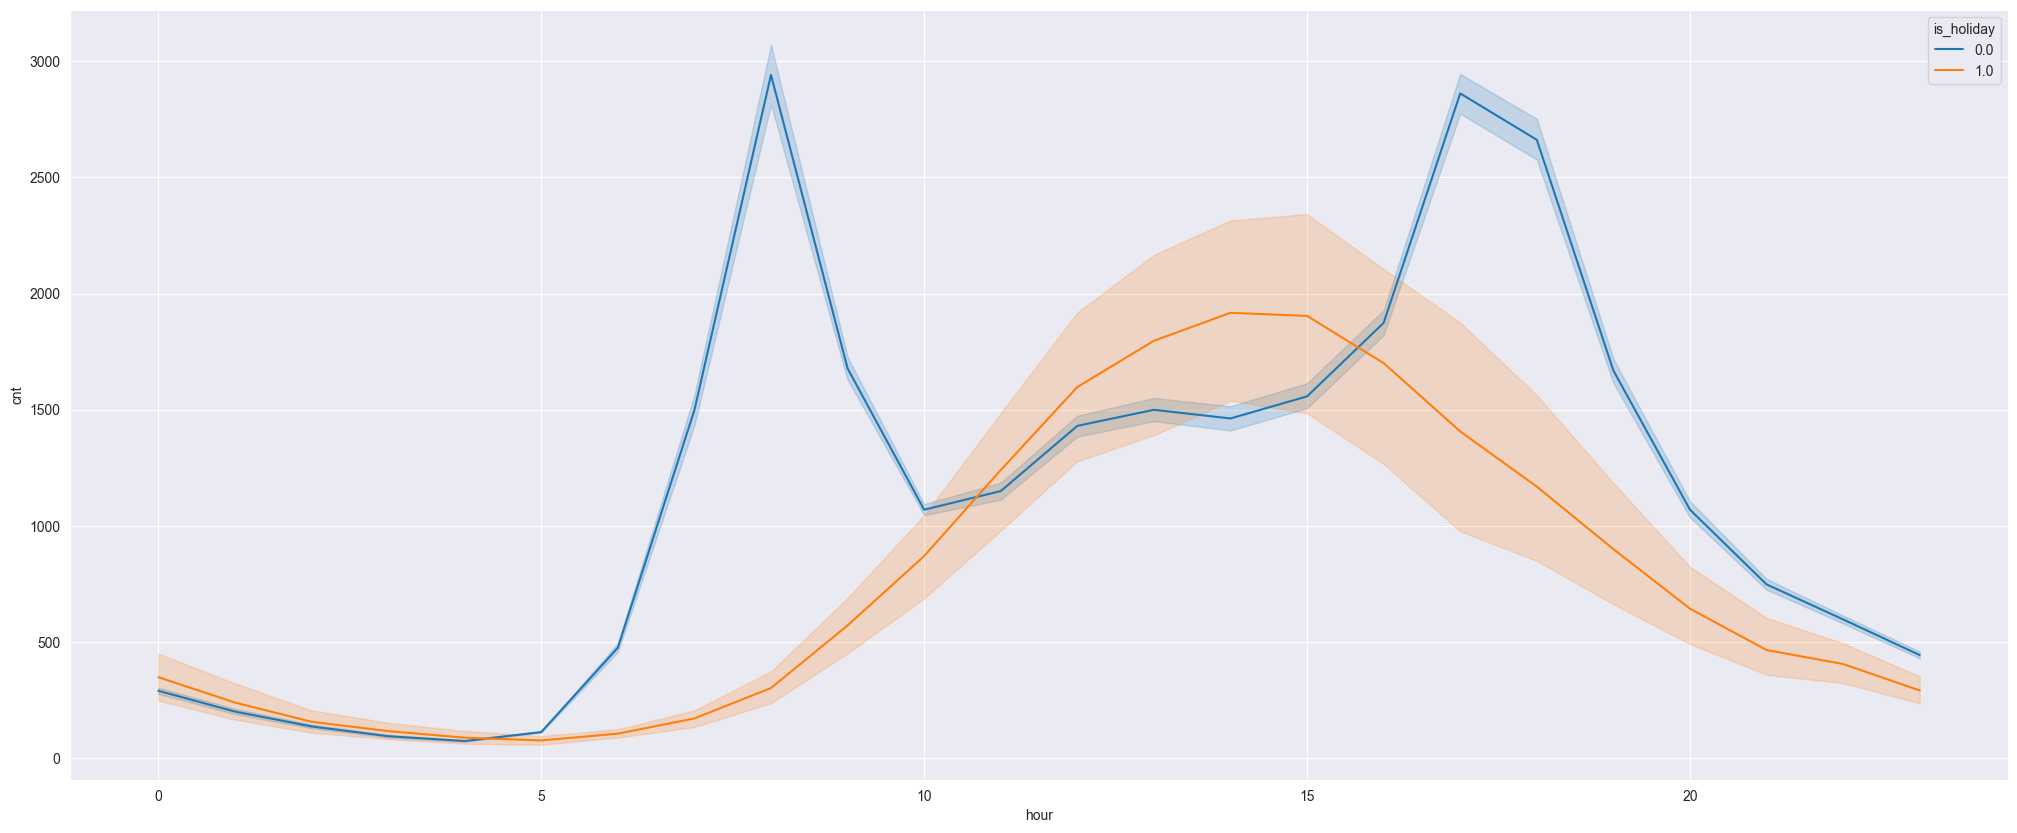

In [212]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(25, 10))
sns.lineplot(data= df, x = 'hour', y = 'cnt', hue = 'is_holiday')


<AxesSubplot: xlabel='hour', ylabel='cnt'>

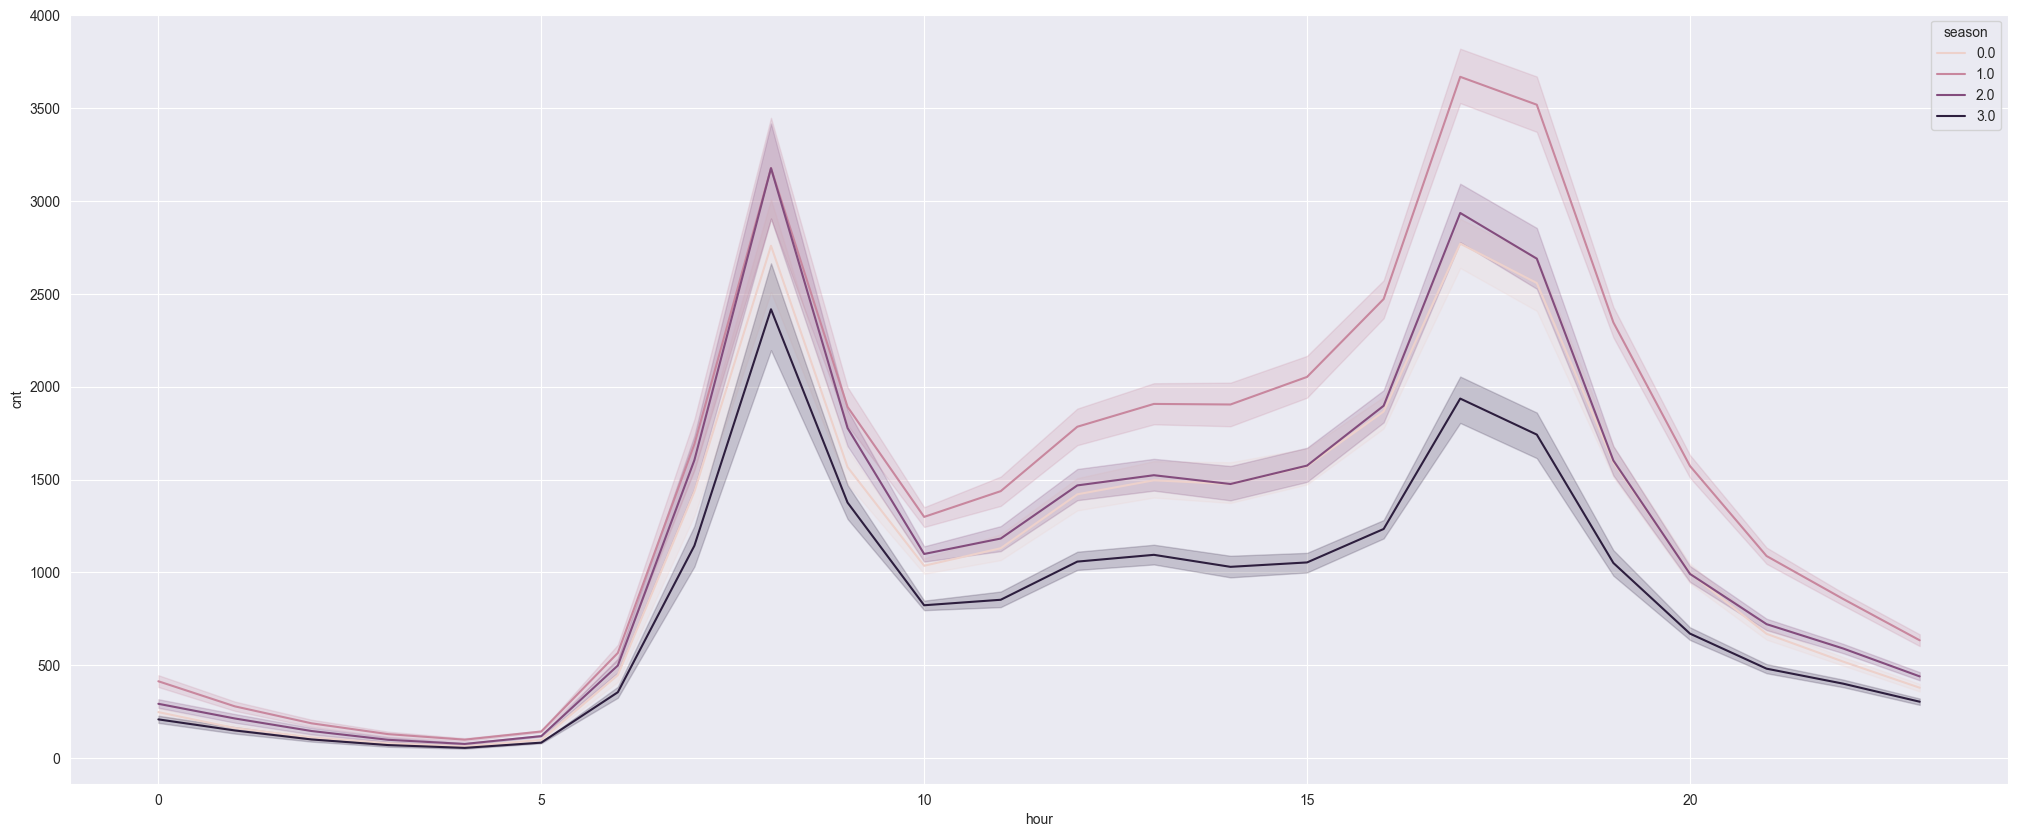

In [213]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(25, 10))
sns.lineplot(data= df, x = 'hour', y = 'cnt', hue = 'season')

AxesSubplot(0.125,0.653529;0.775x0.226471) AxesSubplot(0.125,0.381765;0.775x0.226471) AxesSubplot(0.125,0.11;0.775x0.226471)


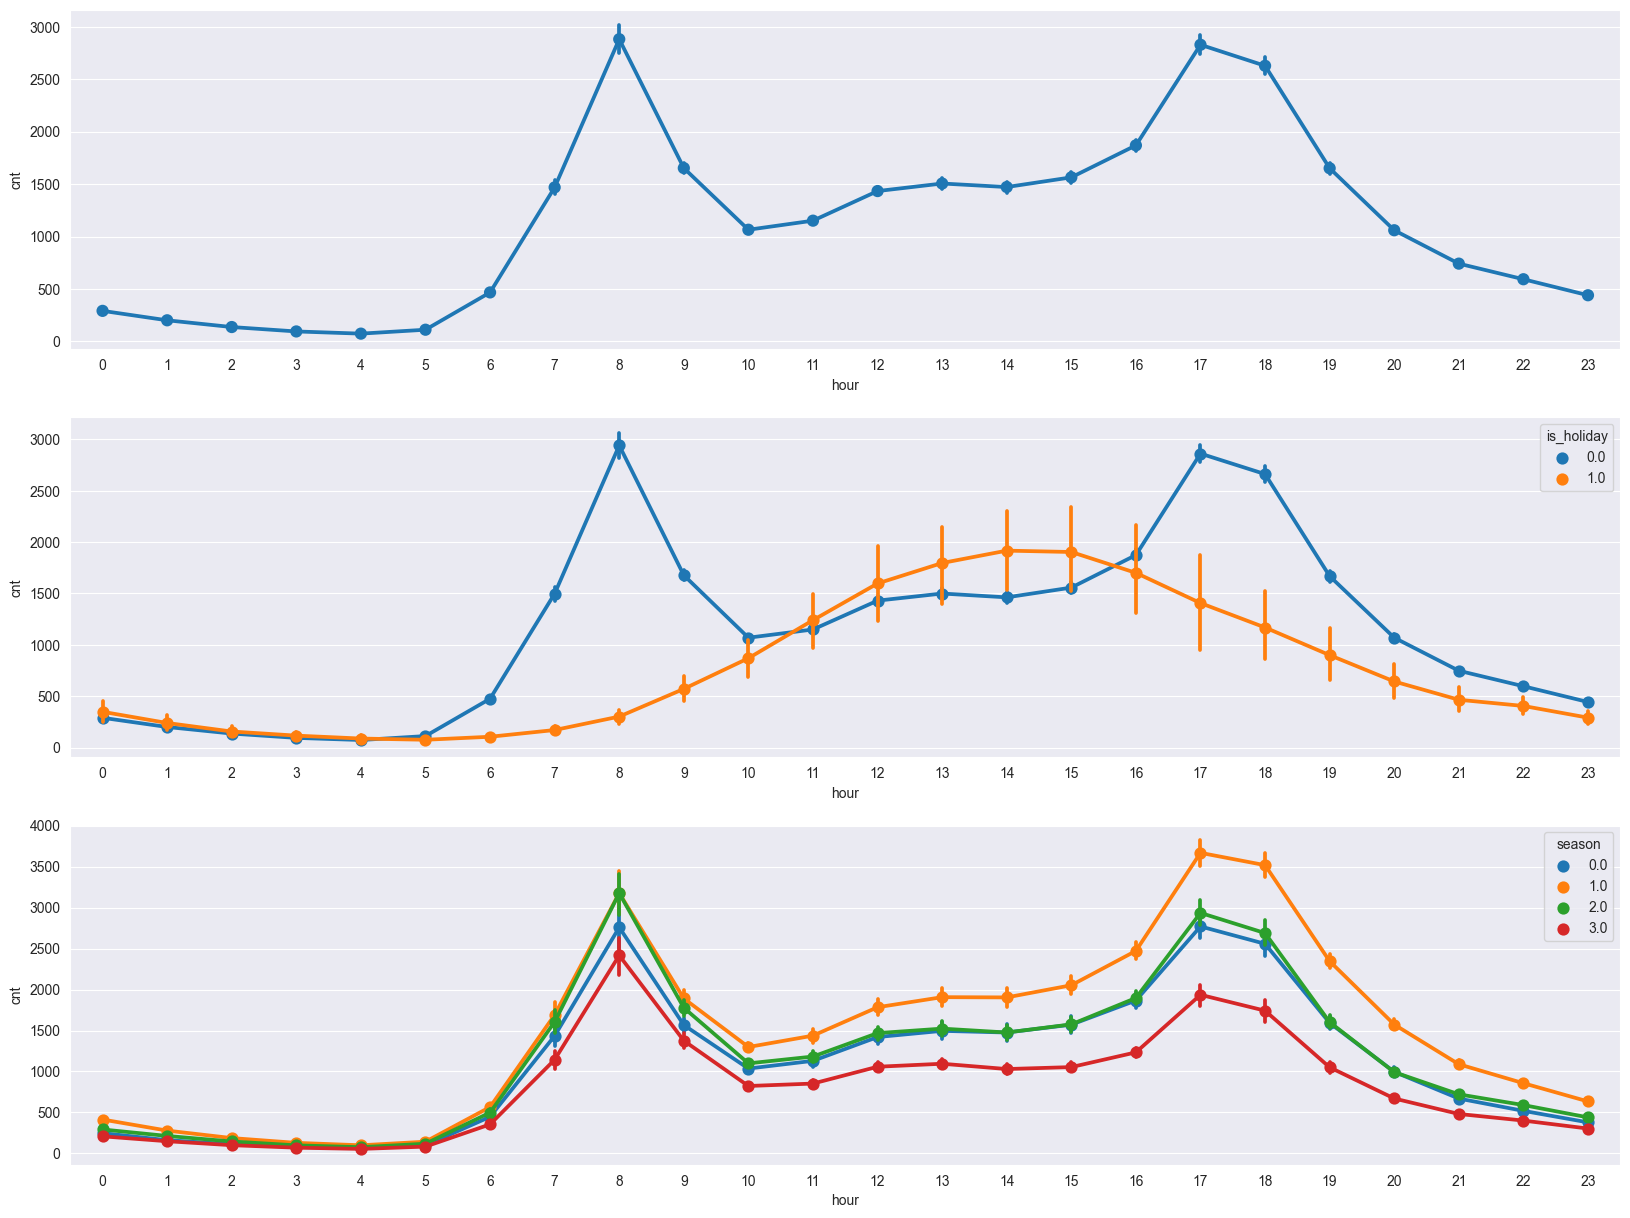

In [160]:
# with pointplot
fig, axes = plt.subplots(nrows = 3, figsize = (20, 15))

result1 = sns.pointplot(data= df, x = 'hour', y = 'cnt', ax= axes[0])
result2 = sns.pointplot(data= df, x = 'hour', y = 'cnt', hue = 'is_holiday', ax= axes[1])
result3 = sns.pointplot(data= df, x = 'hour', y = 'cnt', hue = 'season', ax= axes[2])
print(result1, result2, result3)

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot: xlabel='day_of_week', ylabel='cnt'>

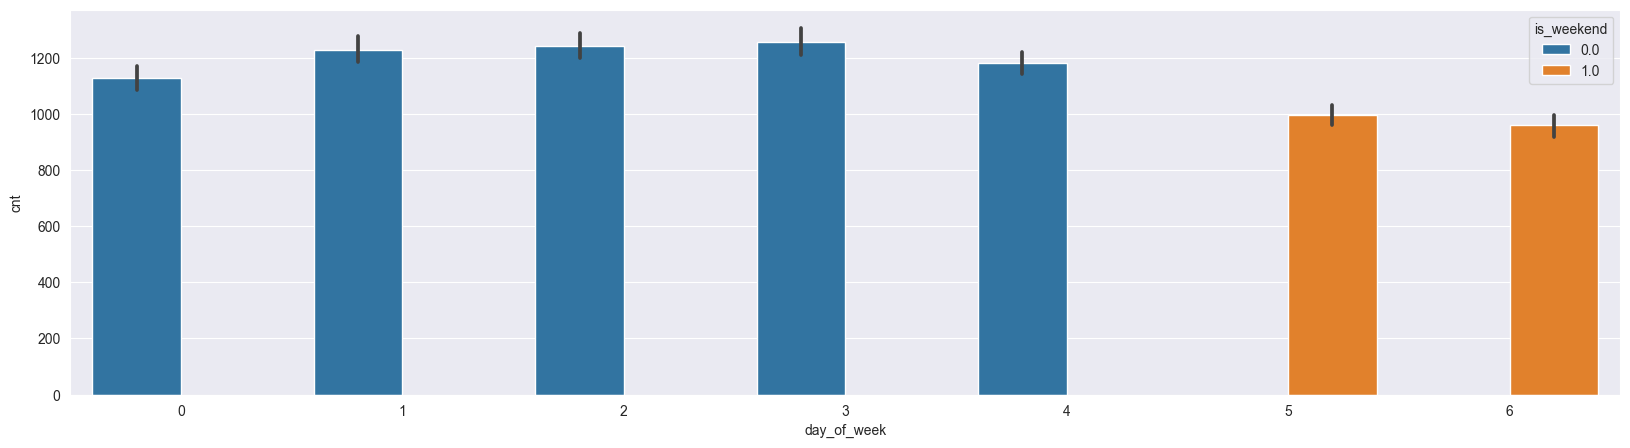

In [214]:
# with barplot
plt.figure(figsize=(20, 5))
sns.barplot(data= df, x = 'day_of_week', y = 'cnt', hue = 'is_weekend')

AxesSubplot(0.125,0.53;0.775x0.35) AxesSubplot(0.125,0.11;0.775x0.35)


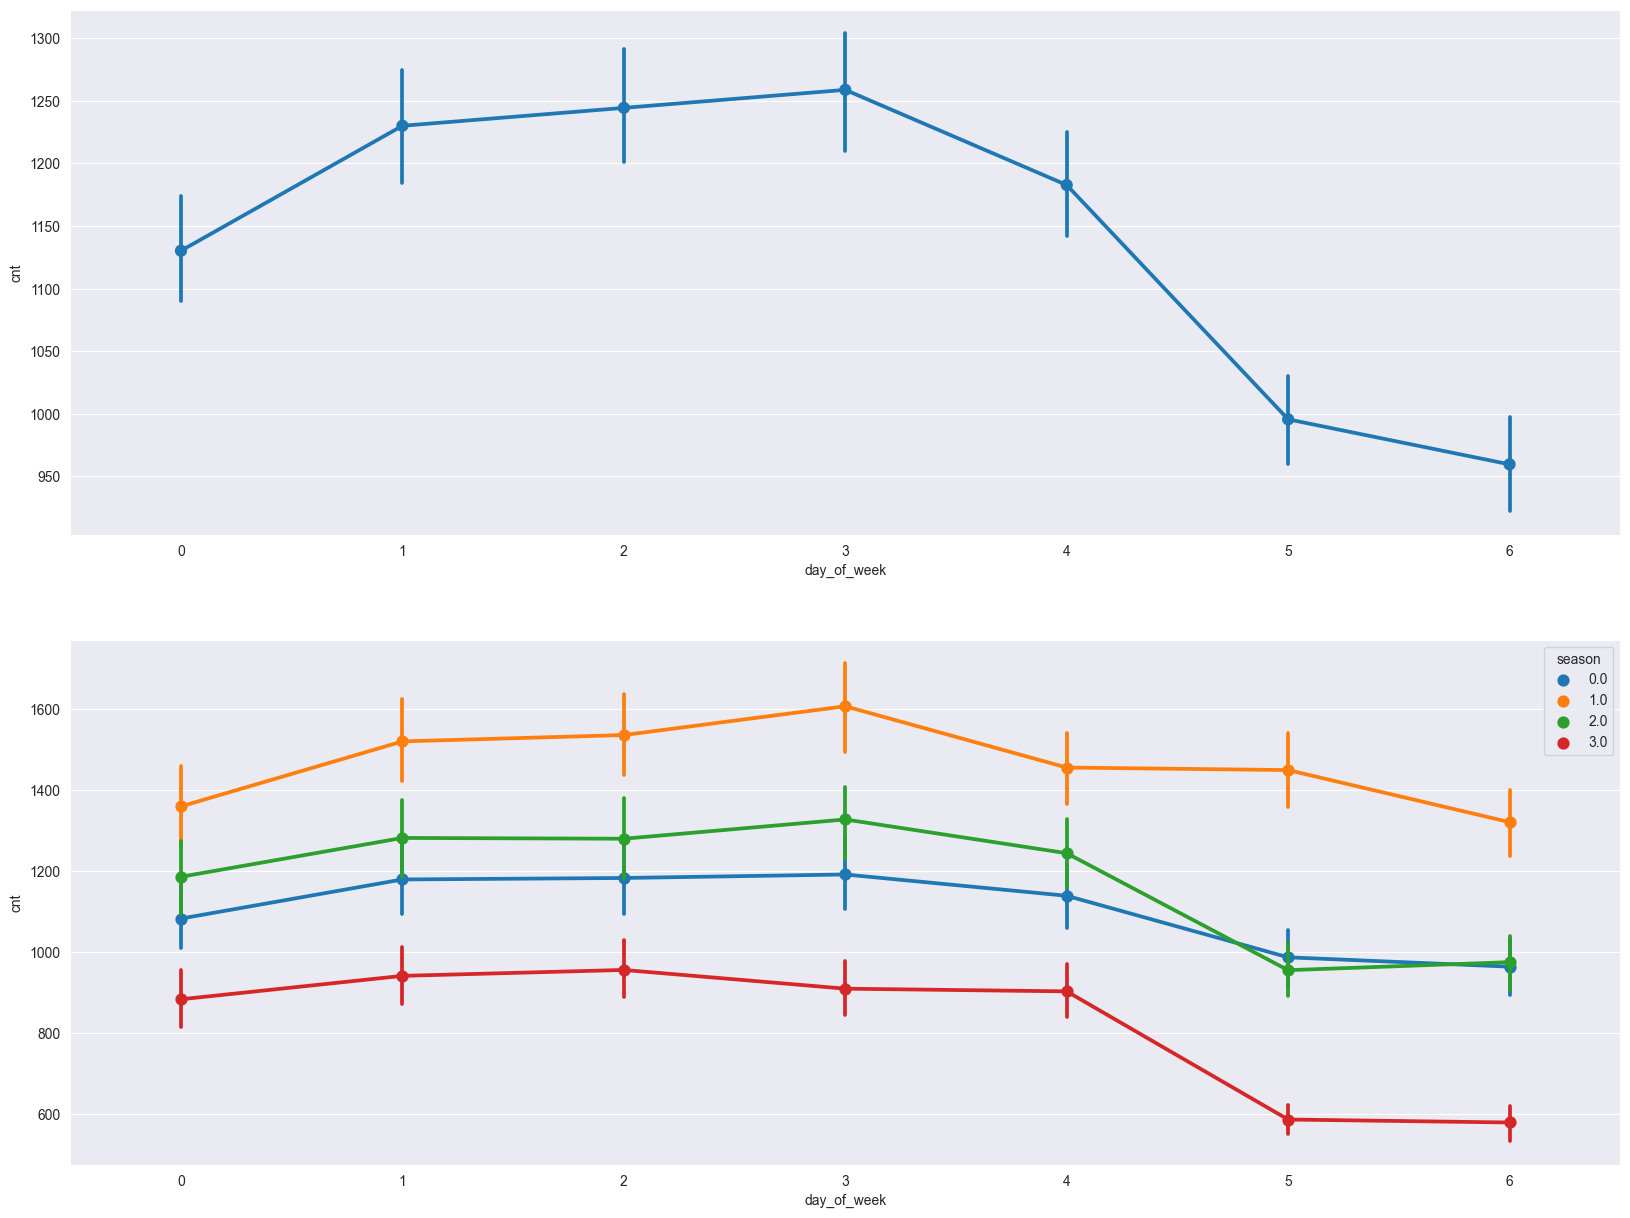

In [167]:
# with pointplot
fig, axes = plt.subplots(nrows = 2, figsize = (20, 15))

result1 = sns.pointplot(data= df, x = 'day_of_week', y = 'cnt', ax= axes[0])
result2 = sns.pointplot(data= df, x = 'day_of_week', y = 'cnt', hue = 'season', ax= axes[1])
print(result1, result2)

### 13.Plot bike shares by day of month

<AxesSubplot: xlabel='day_of_month', ylabel='cnt'>

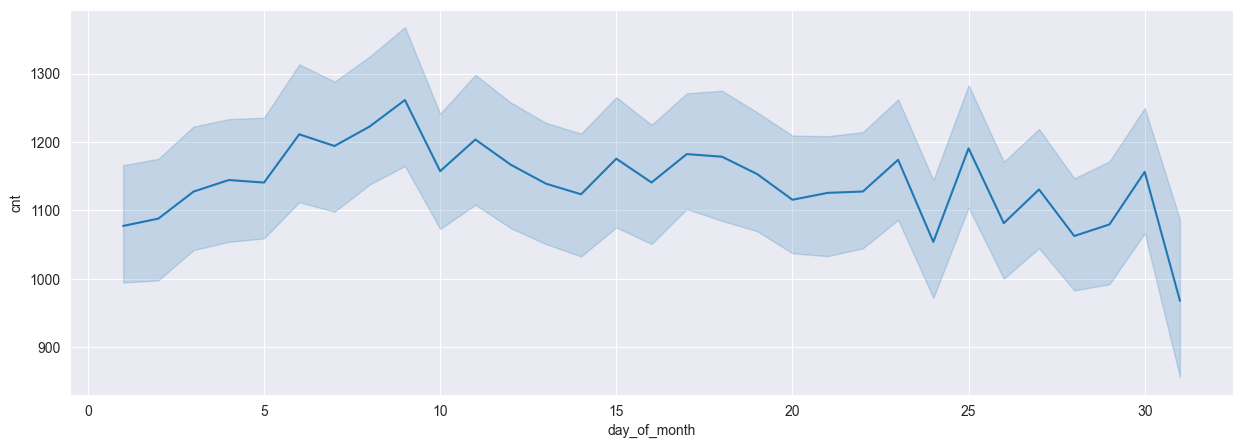

In [183]:
#with lineplot
df_mean = pd.DataFrame(df.groupby('day_of_month')['cnt'].mean())
plt.figure(figsize=(15, 5))
result = sns.lineplot(data = df, x = 'day_of_month', y = 'cnt')
result
# df_mean

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

<AxesSubplot: xlabel='year', ylabel='cnt'>

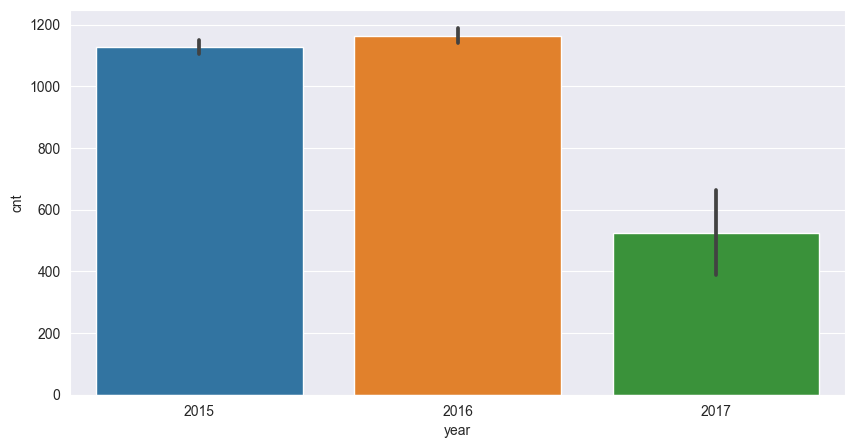

In [202]:
# with barplot
plt.figure(figsize=(10, 5))
sns.barplot(data= df, x = 'year', y = 'cnt')


<AxesSubplot: xlabel='season', ylabel='cnt'>

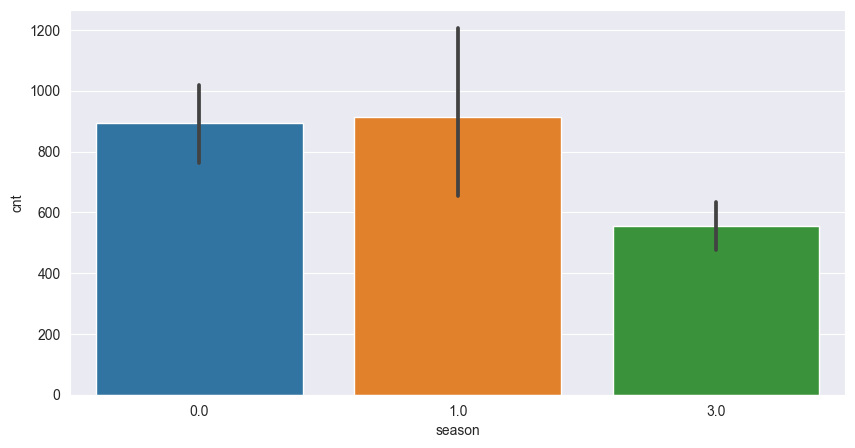

In [201]:
# with barplot
plt.figure(figsize=(10, 5))
sns.barplot(data= df[df['is_holiday']==1.0], x = 'season', y = 'cnt')

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [191]:
df['is_weekend'].value_counts()
df.is_weekend.value_counts().values

array([12444,  4970])

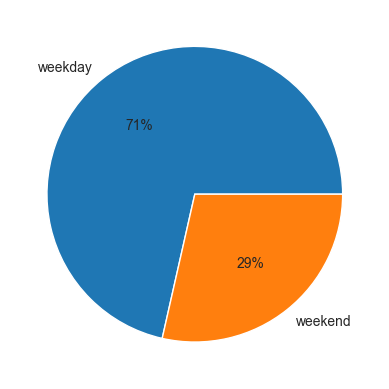

In [193]:
# pie chart
plt.pie(x = df['is_weekend'].value_counts().values, 
            labels= ['weekday', 'weekend'],
            autopct='%1.0f%%')
plt.show()


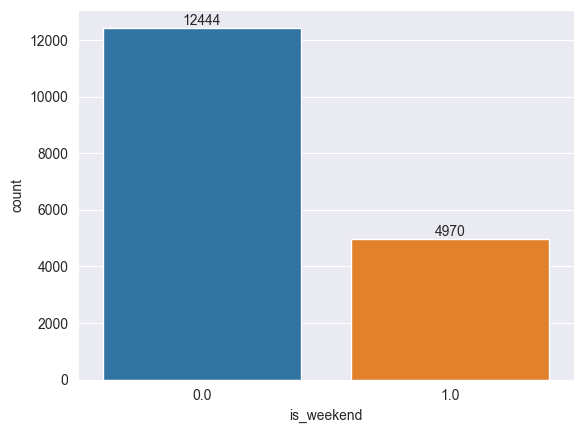

In [200]:
# with countplot
df_plot = sns.countplot(data = df, x = 'is_weekend')
# result
for label in df_plot.containers:
    df_plot.bar_label(label)
plt.show()


### 16.Plot the distribution of weather code by seasons

<AxesSubplot: xlabel='weather_code', ylabel='count'>

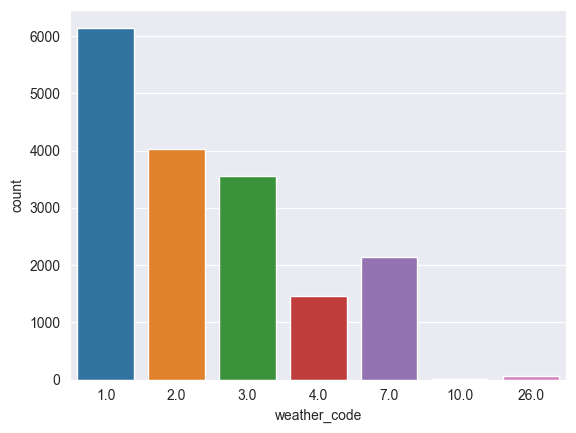

In [199]:
# with countplot
sns.countplot(data = df, x = 'weather_code')


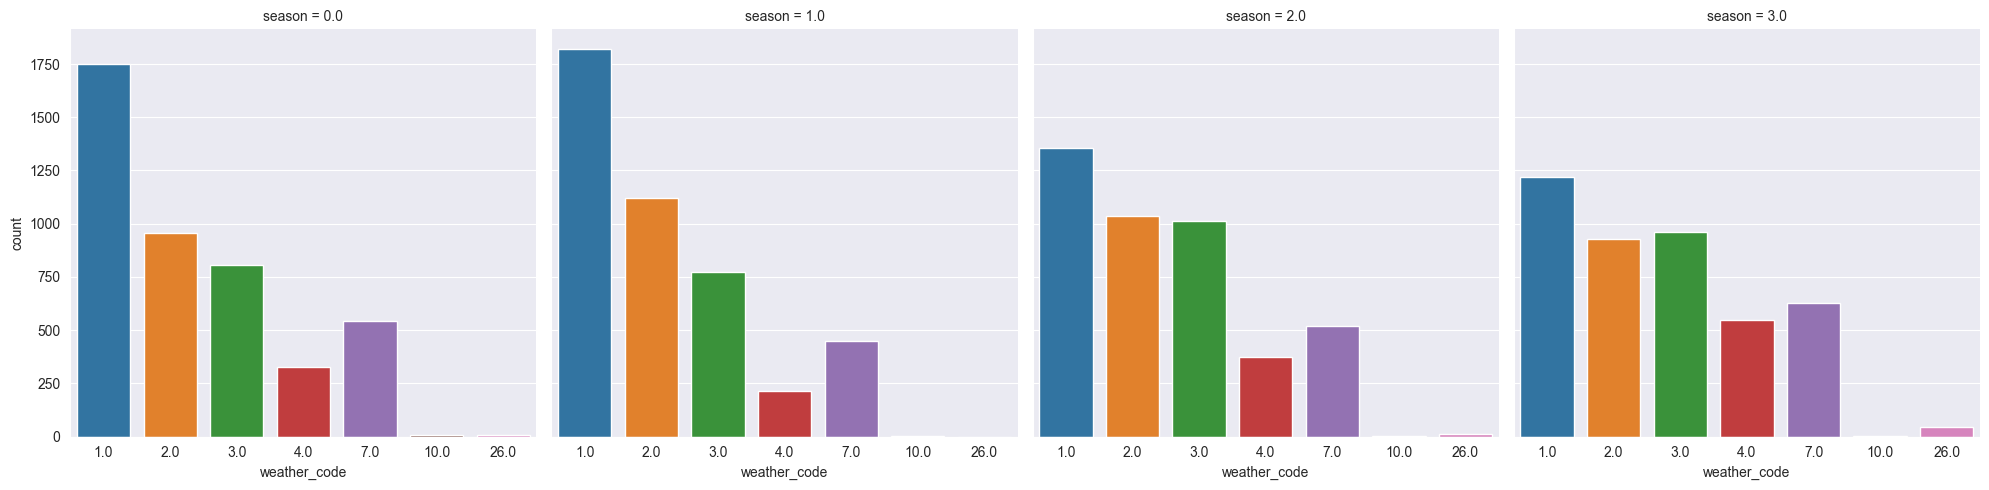

In [206]:
# with catplot
sns.catplot(data= df, x = 'weather_code', col= 'season', kind = "count")
